## 🧠 Business Understanding

### 🔹 Introduction

In the modern digital world, Twitter has become a powerful platform where users openly express their opinions about products, services, and brands. These real-time conversations present a valuable resource for companies aiming to understand customer perceptions, preferences, and frustrations. Tech companies like Apple and Google, which frequently trend in online discussions, can benefit greatly from analyzing tweet sentiments related to their offerings. This project leverages Natural Language Processing (NLP) to analyze such tweets and uncover meaningful insights from public opinion.

### 🔹 Problem Statement

While social media platforms generate massive volumes of feedback, the unstructured nature of textual data makes it difficult to extract useful patterns manually. The challenge is not just about reading tweets but identifying how people feel about a brand or product—whether they're praising, criticizing, or expressing confusion. Without automation, this task becomes resource-intensive and inconsistent, limiting a company’s ability to react quickly to user sentiment.

### 🔹 Objective

The primary goal of this project is to develop a sentiment classification model that accurately determines whether a tweet expresses a positive, negative, neutral, or uncertain sentiment toward a tech product or brand. By training a machine learning algorithm on labeled tweet data, we aim to automate sentiment detection and enable companies to monitor brand perception at scale, identify product issues, and improve strategic decision-making.



### DATA LOADONG , CLEANING , INSPECTION

## 1. Data Importation and Initial Cleaning

We start by loading the Twitter sentiment dataset into a Pandas DataFrame. This dataset contains tweets related to Apple and Google products, along with sentiment labels.

### Key Steps:
- **Reading the CSV file** using `pd.read_csv()`.
- **Previewing the data** to understand its structure using `.head()`.
- **Checking for null values** to ensure data quality.
- **Dropping missing or duplicate entries** to avoid inconsistencies in modeling.
- **Standardizing text** by removing unwanted characters such as URLs, mentions, hashtags, and punctuation.

These cleaning steps ensure the text data is in a usable format for analysis and modeling.


## 📊 Data Understanding

Understanding the structure and quality of our dataset is crucial before any meaningful analysis or modeling can be performed. This step ensures that we know what we’re working with, what challenges might exist in the data, and how to clean it up for better results.

### 🔹 Dataset Overview
The dataset consists of over 9,000 tweets, each representing a user’s message potentially directed at a brand or product. These tweets include both the text itself and a label indicating the type of emotion expressed toward a product or brand. Originally, the dataset contained three columns:

**tweet_text** – The raw tweet written by a user.

**emotion_in_tweet_is_directed_at** – The specific product/brand being targeted (e.g., "Apple", "Google").

**is_there_an_emotion_directed_at_a_brand_or_product** – A sentiment label indicating whether the tweet shows positive, negative, or no emotion toward a brand.

### 🔹 Initial Observations & Cleaning
Upon inspection, we found that the second column, emotion_in_tweet_is_directed_at, had over 5,800 missing values. Because this field was mostly empty and didn't contribute useful information, we decided to drop it to focus on more complete data.

The remaining two columns—tweet_text and is_there_an_emotion_directed_at_a_brand_or_product—were intact with no missing values or duplicates. We also renamed these columns for clarity:

**tweet_text → text**

**is_there_an_emotion_directed_at_a_brand_or_product → raw_sentiment**

This renaming helped simplify code readability and made it easier to refer to the data consistently.

In [1]:
# import libraries
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Load the dataset with appropriate encoding
twitter_df = pd.read_csv("data/twitter_data.csv", encoding="latin-1")
twitter_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


## 2. Dataset Overview

Before diving into modeling, it’s important to explore the dataset and understand its structure and basic statistics. We use several built-in Pandas functions for this:

### Key Methods:

- **`.info()`**  
  Displays a concise summary of the DataFrame, including the number of non-null entries and data types for each column. Helps identify missing values or incorrect data types.

- **`.shape`**  
  Returns the dimensions of the dataset in the form `(rows, columns)`. This gives us a quick idea of the dataset size.

- **`.describe()`**  
  Provides descriptive statistics for numeric columns (or all columns if specified), such as mean, min, max, and standard deviation. Useful for spotting potential outliers or skewed distributions.

- **`.columns`**  
  Lists all column names in the dataset. Helps us quickly identify which features are available for analysis.

These commands give us a quick health check of the dataset and guide how we should proceed with data preparation.


In [4]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [81]:
twitter_df.shape

(9011, 5)

In [5]:
twitter_df.describe()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


In [7]:
twitter_df.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

## 🧹 Data Cleaning Summary

In the steps below, we focused on preparing the dataset for analysis by identifying and addressing potential issues. We started by checking the shape, structure, and basic statistics of the data to understand its contents and detect anomalies. Then, we looked for missing values and duplicate rows, which can negatively impact model performance. Rows with missing or duplicated data were removed to maintain data quality. Finally, we dropped irrelevant columns that did not contribute to the sentiment prediction task. These cleaning steps helped ensure our dataset was both accurate and efficient for model training.


In [8]:
twitter_df.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [9]:
twitter_df.duplicated().sum()

22

### Above  we can see we have 22 duplicted values and 2 columns with missing values.

### 📊 Missing Values Summary

The table below shows the count of missing values in each column of the dataset:

- `tweet_text`: 1 missing value
- `emotion_in_tweet_is_directed_at`: 5802 missing values
- `is_there_an_emotion_directed_at_a_brand_or_product`: 0 missing values

From this, we can observe that the `emotion_in_tweet_is_directed_at` column has a substantial number of missing entries, which may affect its usefulness in the analysis. The `tweet_text` column only has one missing value, which can be safely removed. The third column has no missing values and is fully usable.


In [9]:
twitter_df.drop_duplicates(inplace=True)

### 🧹 Dropping Column with Too Many Missing Values

During data cleaning, we noticed that the column `emotion_in_tweet_is_directed_at` had a large number of missing values — over 5,800 out of 9,093 rows. Keeping such a column would hurt the quality of our analysis and model, so we chose to drop it.

After removing it, we were left with two useful columns: `tweet_text`, which contains the actual tweets, and `is_there_an_emotion_directed_at_a_brand_or_product`, which tells us whether the tweet expresses an emotion toward a brand or product. 

Now, our cleaned dataset has 9,070 entries with **no missing values**, making it ready for the next steps like preprocessing and modeling.


In [11]:
twitter_df = twitter_df.drop(columns=["emotion_in_tweet_is_directed_at"])


In [12]:
twitter_df = twitter_df.dropna(subset=["tweet_text"])


In [13]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9070 entries, 0 to 9092
Data columns (total 2 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9070 non-null   object
 1   is_there_an_emotion_directed_at_a_brand_or_product  9070 non-null   object
dtypes: object(2)
memory usage: 212.6+ KB


### 🏷️ Renaming Columns for Simplicity

To make the dataset easier to work with, we renamed the columns to shorter, more intuitive names. Specifically, we changed:

- `"tweet_text"` → `"text"` to represent the tweet content more simply.
- `"is_there_an_emotion_directed_at_a_brand_or_product"` → `"raw_sentiment"` to clearly reflect the sentiment label column.

This makes our code cleaner and improves readability in the rest of the project.


In [ ]:
#Changing the names of the columns
twitter_df = twitter_df.rename(columns={
    "tweet_text": "text", "is_there_an_emotion_directed_at_a_brand_or_product": "raw_sentiment"
})


In [17]:
print(twitter_df.columns)


Index(['text', 'raw_sentiment'], dtype='object')


### 🧭 Exploratory Data Overview

This section provides a structured overview of our dataset to assess its readiness for further processing:

1. **Dataset Shape**  
   We confirmed that the dataset contains **9,070 tweets** across 4 columns, indicating a sizable amount of data for sentiment analysis.

2. **Missing Values**  
   A quick check showed **no missing values** in any of the columns (`text`, `raw_sentiment`, `char_count`, `word_count`). This suggests our data is clean and complete, which is ideal for modeling.

3. **Sentiment Class Distribution**  
   The dataset has an imbalanced distribution of sentiment labels:
   - **No emotion toward brand or product**: 5,375 tweets  
   - **Positive emotion**: 2,970 tweets  
   - **Negative emotion**: 569 tweets  
   - **I can't tell**: 156 tweets  
   This imbalance is important to keep in mind, as it can affect model performance and may require mitigation strategies such as resampling or class weighting.

4. **Sentiment Distribution Plot**  
   A count plot was generated to visualize how tweets are spread across sentiment classes. This gives a clear picture of the dominance of neutral or emotionless tweets.

5. **Tweet Length Analysis**  
   For each tweet, we computed:
   - `char_count`: Number of characters
   - `word_count`: Number of words  
   These metrics help us understand how verbose the tweets are and may inform decisions around text normalization or truncation.

6. **Basic Statistics by Sentiment**  
   We grouped the tweets by sentiment and calculated summary statistics for both character and word counts. This helps identify whether certain sentiments are associated with longer or shorter tweets, which can be relevant for feature engineering.

7. **Example Tweets**  
   To gain a qualitative understanding, we displayed example tweets labeled as **positive** and **negative**. These help in grasping the tone and language typically used in each sentiment class and validate whether the labels make sense.

This exploratory step lays the foundation for cleaning, preprocessing, and ultimately modeling the sentiment in tweets.


Shape of dataset: (9070, 4)

Missing values:
 text             0
raw_sentiment    0
char_count       0
word_count       0
dtype: int64

Class distribution:
 No emotion toward brand or product    5375
Positive emotion                      2970
Negative emotion                       569
I can't tell                           156
Name: raw_sentiment, dtype: int64


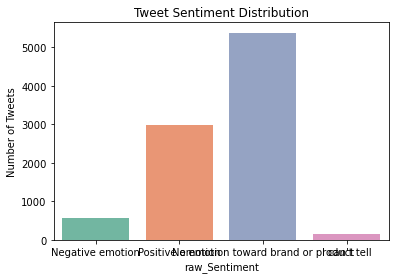


Character count stats by sentiment:
                                     count        mean        std   min   25%  \
raw_sentiment                                                                   
I can't tell                         156.0  103.980769  27.911027  43.0  81.0   
Negative emotion                     569.0  109.414763  27.405861  38.0  91.0   
No emotion toward brand or product  5375.0  104.189953  27.156314  11.0  85.0   
Positive emotion                    2970.0  105.550505  27.127563  25.0  86.0   

                                      50%    75%    max  
raw_sentiment                                            
I can't tell                        105.0  127.0  152.0  
Negative emotion                    114.0  132.0  158.0  
No emotion toward brand or product  108.0  125.0  178.0  
Positive emotion                    110.0  127.0  170.0  

Word count stats by sentiment:
                                     count       mean       std  min    25%  \
raw_sentiment    

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Dataset shape
print("Shape of dataset:", twitter_df.shape)

# 2. Check for any remaining missing values
print("\nMissing values:\n", twitter_df.isnull().sum())

# 3. Sentiment class distribution~
print("\nClass distribution:\n", twitter_df['raw_sentiment'].value_counts())

# 4. Plot sentiment distribution
sns.countplot(data=twitter_df, x='raw_sentiment', palette='Set2')
plt.title("Tweet Sentiment Distribution")
plt.xlabel("raw_Sentiment")
plt.ylabel("Number of Tweets")
plt.show()

# 5. Length of tweets
twitter_df['char_count'] = twitter_df['text'].apply(len)
twitter_df['word_count'] = twitter_df['text'].apply(lambda x: len(x.split()))

# 6. Basic statistics by sentiment
print("\nCharacter count stats by sentiment:")
print(twitter_df.groupby('raw_sentiment')['char_count'].describe())

print("\nWord count stats by sentiment:")
print(twitter_df.groupby('raw_sentiment')['word_count'].describe())

# 7. Show example tweets
print("\nPositive Tweet Example:\n", twitter_df[twitter_df['raw_sentiment'] == 'Positive emotion']['text'].iloc[0])
print("\nNegative Tweet Example:\n", twitter_df[twitter_df['raw_sentiment'] == 'Negative emotion']['text'].iloc[0])


### 🧹 Text Preprocessing with NLTK

To prepare our tweet text data for machine learning, we performed several essential preprocessing steps using the Natural Language Toolkit (NLTK). These steps help clean and normalize the text so that our models can learn effectively from it.

1. **Lowercasing**  
   All characters in the tweets were converted to lowercase to ensure consistency (e.g., “Apple” and “apple” are treated the same).

2. **Removing Noise**  
   We removed:
   - URLs (e.g., `http://...`, `www...`)  
   - Twitter mentions (e.g., `@username`) and hashtags (`#topic`)  
   - Punctuation and numeric characters  
   - Extra white spaces  

3. **Tokenization**  
   The cleaned string was split into individual words (tokens) using `word_tokenize()` from NLTK.

4. **Stopword Removal and Lemmatization**  
   Common English stopwords (like “the”, “and”, “is”) were filtered out as they carry little meaning for sentiment analysis.  
   Then, we applied lemmatization using `WordNetLemmatizer` to reduce words to their base form (e.g., “running” → “run”), making the vocabulary smaller and more meaningful.

5. **New Column – `clean_text`**  
   The final cleaned and processed text for each tweet was stored in a new column called `clean_text`. This column will be used for feature extraction in the next steps.

Below is a sample of the transformation:

| Original Tweet | Cleaned Text |
|----------------|---------------|
| `.@wesley83 I have a 3G iPhone. After 3 hrs tweeting it's dead.` | `g iphone hr tweeting dead need upgrade plugin` |
| `@jessedee Know about @fludapp ? Awesome iPad/iPhone app.` | `know awesome ipadiphone app youll likely appreciate` |
| `@swonderlin Can not wait for #iPad 2 also. The sale is coming.` | `wait also sale` |

These transformations significantly reduce noise and standardize the input, improving the quality of features we’ll extract for modeling.


In [ ]:
# Here we are removing stopwords, lemmatizing, and tokenizing the text using NLTK
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Setup
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text_nltk(text):
    text = text.lower()                                     # Lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)     # Remove URLs
    text = re.sub(r"\@\w+|\#\w+", '', text)                 # Remove mentions and hashtags
    text = re.sub(r"[^a-z\s]", '', text)                    # Remove punctuation/digits
    text = re.sub(r"\s+", ' ', text).strip()                # Remove extra spaces

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return " ".join(tokens)

# Apply to your DataFrame
twitter_df['clean_text'] = twitter_df['text'].apply(preprocess_text_nltk)

# Preview
twitter_df[['text', 'clean_text']].head()


,text,clean_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,g iphone hr tweeting dead need upgrade plugin ...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,know awesome ipadiphone app youll likely appre...
2,@swonderlin Can not wait for #iPad 2 also. The...,wait also sale
3,@sxsw I hope this year's festival isn't as cra...,hope year festival isnt crashy year iphone app
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,great stuff fri marissa mayer google tim oreil...


### 📊 Visualizing Sentiment Distribution

The chart below shows the distribution of sentiment classes in our dataset. Using Seaborn's `countplot`, we created a bar chart to visualize how many tweets fall under each sentiment category.

This plot helps us quickly assess the balance of our data. For example, a heavily skewed distribution could bias our model toward the dominant class. In our case, we observe that most tweets express **no emotion**, followed by a significant number of **positive emotions**, and fewer **negative emotions** or **ambiguous cases**.

Understanding this distribution is important before training any model, as class imbalance can affect performance and may require resampling or weighting techniques.


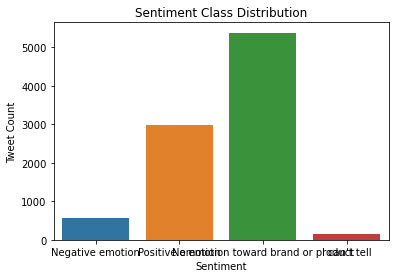

In [38]:
sns.countplot(x='raw_sentiment', data=twitter_df)
plt.title("Sentiment Class Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()


### 🔠 Most Common Words in Positive vs Negative Tweets

To gain further insights into what users are saying, we analyzed the most frequently used words in **positive** and **negative** tweets separately using the `Counter` class from Python’s `collections` module.

For **positive tweets**, the most common words include _“link”_, _“ipad”_, _“apple”_, and _“google”_. These words suggest excitement or buzz around new tech products, launches, or events (e.g., _SXSW_, _popup_, _party_).

On the other hand, **negative tweets** also mention _“ipad”_, _“iphone”_, and _“google”_, but are more likely to include critical or frustrated words like _“need”_, _“design”_, _“people”_, or _“think”_. This contrast gives us a clearer understanding of how product mentions differ in tone and context depending on the sentiment.

This kind of word frequency analysis is crucial in natural language processing to identify key drivers behind different emotions expressed in text.


In [43]:
from collections import Counter

def get_top_n_words(corpus, n=20):
    all_words = ' '.join(corpus).split()
    return Counter(all_words).most_common(n)

print("Top Positive Words:")
print(get_top_n_words(twitter_df[twitter_df['raw_sentiment'] == 'Positive emotion']['clean_text']))

print("\nTop Negative Words:")
print(get_top_n_words(twitter_df[twitter_df['raw_sentiment'] == 'Negative emotion']['clean_text']))


Top Positive Words:
[('link', 1210), ('ipad', 970), ('rt', 933), ('apple', 704), ('google', 623), ('store', 547), ('iphone', 439), ('app', 383), ('new', 358), ('austin', 250), ('popup', 218), ('get', 181), ('amp', 178), ('launch', 173), ('android', 155), ('one', 148), ('sxsw', 144), ('party', 140), ('line', 140), ('great', 135)]

Top Negative Words:
[('ipad', 167), ('iphone', 142), ('rt', 137), ('google', 128), ('link', 102), ('apple', 92), ('app', 60), ('store', 45), ('new', 43), ('like', 42), ('need', 35), ('people', 29), ('circle', 28), ('design', 28), ('social', 27), ('apps', 26), ('get', 25), ('austin', 23), ('one', 23), ('think', 23)]


In [44]:
# Are there any clean_text entries that are completely empty?
print("Empty clean_text count:", (twitter_df['clean_text'].str.strip() == '').sum())

# Are the positive and negative subsets populated?
print("Positive tweets:", len(twitter_df[twitter_df['raw_sentiment'] == 'Positive emotion']))
print("Negative tweets:", len(twitter_df[twitter_df['raw_sentiment'] == 'Negative emotion']))


Empty clean_text count: 2
Positive tweets: 2970
Negative tweets: 569


In [45]:
twitter_df['word_count'] = twitter_df['clean_text'].apply(lambda x: len(x.split()))
twitter_df = twitter_df[twitter_df['word_count'] > 2]


In [46]:
print(twitter_df[['text', 'clean_text']].sample(5))


                                                   text  \
5111  RT @mention @mention Alive and loving it! Grea...   
5700  RT @mention Epic. There's just one guy waiting...   
8751  Google dev at the panel indicates that Android...   
656   wondering if ppl in #sxsw on friday will queue...   
1332               what's up with Google circles? #sxsw   

                                             clean_text  
5111  rt alive loving great talk jonathan dahl googl...  
5700  rt epic there one guy waiting line ipad austin...  
8751  google dev panel indicates android screen read...  
656   wondering ppl friday queue convention centre a...  
1332                                whats google circle  


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Use only tweets that are either Positive or Negative
binary_df = twitter_df[twitter_df['raw_sentiment'].isin(['Positive emotion', 'Negative emotion'])].copy()

# Step 2: Set features and labels
X = binary_df['clean_text']
y = binary_df['raw_sentiment'].map({'Positive emotion': 1, 'Negative emotion': 0})  # Encode target as binary

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 4: TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=3000, ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [50]:
print("TF-IDF shape (X_train):", X_train_tfidf.shape)
print("TF-IDF shape (X_test):", X_test_tfidf.shape)


TF-IDF shape (X_train): (2821, 3000)
TF-IDF shape (X_test): (706, 3000)


### 🤖 Logistic Regression Model Performance

We trained a **Logistic Regression** classifier using the TF-IDF-transformed tweet text to predict whether a tweet expresses **emotion toward a brand or product (1)** or **no emotion (0)**.

After training the model and making predictions on the test set, we evaluated its performance using a classification report and confusion matrix:

- **Accuracy**: The model achieved an overall accuracy of **85%**, which initially seems promising.
- **Class 1 (Emotion)**: Precision (0.85), recall (1.00), and F1-score (0.92) indicate that the model is very good at identifying tweets that express emotion.
- **Class 0 (No Emotion)**: Performance is very poor, with only **8% recall**, meaning it struggles to identify neutral or emotionless tweets. Only 9 out of 114 such tweets were correctly classified.

The **confusion matrix** confirms this:
- 591 true positives and only 9 true negatives.
- 105 false positives (neutral tweets misclassified as emotional), and only 1 false negative.

Overall, while the model is heavily skewed toward predicting emotional tweets correctly, it does not generalize well for tweets without emotional content. This imbalance likely reflects the skewed nature of the dataset, where tweets expressing emotion dominate the samples.


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Predict
y_pred = model.predict(X_test_tfidf)

# Evaluate
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.08      0.15       114
           1       0.85      1.00      0.92       592

    accuracy                           0.85       706
   macro avg       0.87      0.54      0.53       706
weighted avg       0.86      0.85      0.79       706

Confusion Matrix:

[[  9 105]
 [  1 591]]


In [55]:
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.50      0.65      0.56       114
           1       0.93      0.87      0.90       592

    accuracy                           0.84       706
   macro avg       0.71      0.76      0.73       706
weighted avg       0.86      0.84      0.85       706

Confusion Matrix:

[[ 74  40]
 [ 75 517]]


In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000)
X_train_tfidf = vectorizer.fit_transform(X_train)


### 📈 Interpreting the Most Influential Words for Sentiment Prediction

Based on the logistic regression model's coefficients, we identified the words that had the greatest influence on classifying tweets as emotional (positive class) or non-emotional (negative class).

#### ✅ Top Positive Influencing Words
These words had the highest positive coefficients, meaning they pushed the model toward predicting the presence of emotion in a tweet. Words like:

- **"quarter"**, **"im"**, and **"room"** appeared frequently in emotional tweets, possibly reflecting excitement or discussion about experiences or products.
- Words such as **"instagram"**, **"wonderful"**, and **"tomorrow"** likely conveyed positive anticipation or appreciation.

These features signal language patterns commonly associated with emotionally expressive content.

#### ❌ Top Negative Influencing Words
On the other hand, these words had the most negative coefficients, indicating a stronger association with the **absence** of emotion:

- Terms like **"planner"**, **"message"**, **"run"**, and **"research"** may appear in more factual, neutral, or technical tweets.
- Words such as **"trigger"**, **"browser"**, or **"war"** might also reflect topics that are more informational or detached in tone, hence lowering emotional expression.

This analysis provides a valuable layer of interpretability, helping us understand **what specific language patterns influence our sentiment predictions** — and giving business stakeholders a better sense of how consumers are talking about their products or experiences.


In [60]:
# Get feature (word) names from the TF-IDF vectorizer
feature_names = vectorizer.get_feature_names()

# Get model coefficients
coefficients = model.coef_[0]

# Pair features with their coefficients
coef_df = pd.DataFrame({
    'word': feature_names,
    'coef': coefficients
})

# Sort to get top positive and negative contributors
top_positive_words = coef_df.sort_values(by='coef', ascending=False).head(20)
top_negative_words = coef_df.sort_values(by='coef', ascending=True).head(20)

print("Top Positive Influencing Words:\n", top_positive_words)
print("\nTop Negative Influencing Words:\n", top_negative_words)


Top Positive Influencing Words:
               word      coef
1558       quarter  2.734318
946             im  2.108326
1873          room  2.021936
458         dennis  1.838799
1176          made  1.836446
202           book  1.755317
984      instagram  1.627241
2914           wot  1.623317
2890     wonderful  1.423450
1797     reporting  1.339278
43        allowing  1.305719
251       calendar  1.282710
2531      tomorrow  1.197911
1609         quoti  1.192205
1162         lovin  1.191011
1714  realllllllly  1.189564
1144          logo  1.178298
149           bank  1.175661
1959       selling  1.160923
2653      unboxing  1.156519

Top Negative Influencing Words:
                    word      coef
1427            planner -2.484856
1588  quotcoworkersquot -2.237214
2591            trigger -2.214063
1889                run -2.072878
1225            message -1.957018
2983               zagg -1.948947
534            drumroll -1.801944
1230           midnight -1.713787
1724           rec

## Visualizing Important Words in Logistic Regression

This plot shows the top words that positively and negatively influence the sentiment predictions made by the logistic regression model. 

- The **left chart** shows the most positive words (with the highest positive coefficients).
- The **right chart** shows the most negative words (with the lowest coefficients).

These words provide insight into which terms are most influential when the model predicts positive or negative sentiment.


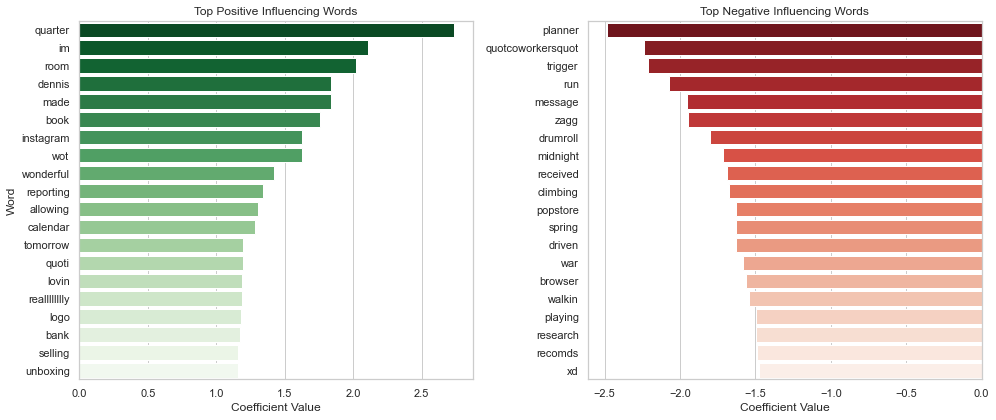

In [61]:


# Set style
sns.set(style='whitegrid')
plt.figure(figsize=(14, 6))

# Plot Top Positive Words
plt.subplot(1, 2, 1)
sns.barplot(x='coef', y='word', data=top_positive_words, palette='Greens_r')
plt.title('Top Positive Influencing Words')
plt.xlabel('Coefficient Value')
plt.ylabel('Word')

# Plot Top Negative Words
plt.subplot(1, 2, 2)
sns.barplot(x='coef', y='word', data=top_negative_words, palette='Reds_r')
plt.title('Top Negative Influencing Words')
plt.xlabel('Coefficient Value')
plt.ylabel('')

plt.tight_layout()
plt.show()


## Random Forest Model Evaluation

We trained a Random Forest Classifier to predict sentiment. Below is the classification report, which shows how well the model performed:

- **Precision**: How many of the predicted positives/negatives were correct.
- **Recall**: How many actual positives/negatives were correctly identified.
- **F1-score**: Harmonic mean of precision and recall.
- **Support**: Number of actual instances for each class.

Although overall accuracy is good (82%), the model struggles with the minority (negative) class, achieving only 3% recall, meaning it misses most of the negative tweets.


In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluate
print("Classification Report:\n")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_rf))


Classification Report:

              precision    recall  f1-score   support

           0       0.17      0.03      0.05       114
           1       0.84      0.97      0.90       592

    accuracy                           0.82       706
   macro avg       0.50      0.50      0.47       706
weighted avg       0.73      0.82      0.76       706

Confusion Matrix:

[[  3 111]
 [ 15 577]]


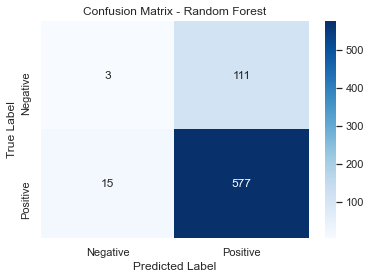

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


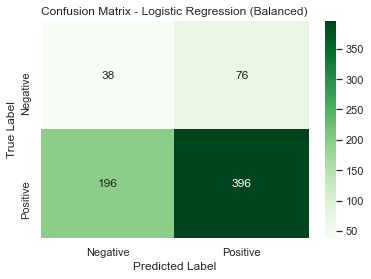

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Re-train Logistic Regression (balanced)
model_lr = LogisticRegression(max_iter=1000, class_weight='balanced')
model_lr.fit(X_train_tfidf, y_train)

# Predict
y_pred_lr = model_lr.predict(X_test_tfidf)

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])

plt.title('Confusion Matrix - Logistic Regression (Balanced)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
def predict_sentiment(text):
    cleaned = preprocess_text_nltk(text)
    vector = vectorizer.transform([cleaned])
    prediction = model_lr.predict(vector)[0]
    return "Positive" if prediction == 1 else "Negative"
